<a href="https://colab.research.google.com/github/RafeeRejab/Hello-World/blob/master/Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
# Partition set `S` into two subsets, `S1` and `S2`, such that the
# difference between the sum of elements in `S1` and the sum
# of elements in `S2` is minimized
def minPartition(S, n, S1=0, S2=0):
 
    # Base case: if the list becomes empty, return the absolute
    # difference between both sets
    if n < 0:
        return abs(S1 - S2)
 
    # Case 1. Include the current item in subset `S1` and recur
    # for the remaining items `n-1`
    inc = minPartition(S, n - 1, S1 + S[n], S2)
 
    # Case 2. Exclude the current item from subset `S1` and recur for
    # the remaining items `n-1`
    exc = minPartition(S, n - 1, S1, S2 + S[n])
 
    return min(inc, exc)
 
 # mindiff
def getSets(S_main,mindiff):
  S1=[0]
  diff=mindiff+1
  total=round(sum(S_main)/2)
  idx=0
  while diff !=mindiff:
    S=S_main.copy()
    random.shuffle(S)
    S1=[0]
    while sum(S1)<total:
      try:
        S1.append(S[idx])
        S.pop(idx)  
      except:
        break
    S2=S
    diff=sum(S1)-sum(S2)
  return(S1[1:],S2)

  # Find the right indices
def findIDX(DF,S1):
  buffer=DF.copy()
  idxS1=[]
  for val in S1:
    idxS1.append(buffer.index[buffer== val].values[0])
    buffer=buffer.drop(buffer.index[buffer== val].values[0])
  return(idxS1)

In [122]:
# Generate the data
import pandas as pd
import random
order_prep_buf=[]
order_cook_buf=[]
No_of_Orders=random.randrange(1,8)
for order in range(No_of_Orders):
        order_prep_time=random.randrange(1, 10)*5
        # Max 1 hour
        if order_prep_time>60:
            order_prep_time=60
        order_prep_buf.append(order_prep_time)
        order_cook_time=random.randrange(1, 10)*5
        # Max 1 hour
        if order_cook_time>60:
            order_cook_time=60
        order_cook_buf.append(order_cook_time)
data={'Preparation':order_prep_buf,'Cooking':order_cook_buf}
DF=pd.DataFrame(data)        
DF

,Preparation,Cooking
0,10,20
1,45,30
2,5,15
3,40,30
4,10,5
5,10,35
6,35,15


In [123]:
# Input: a set of items
S = DF['Preparation'].tolist()
mindiff=minPartition(S, len(S) - 1)
# print(mindiff)
S1,S2= getSets(S,mindiff)
S1idx=findIDX(DF.Preparation,S1)

In [124]:
lsls=S1idx
DF1_prep=DF.loc[lsls, :].reset_index(drop=True)
DF1_prep['Preparation_1']=DF1_prep['Preparation']
DF2_prep=DF.drop(lsls).reset_index(drop=True)
DF2_prep['Preparation_2']=DF2_prep['Preparation']

In [125]:
DF1_prep

,Preparation,Cooking,Preparation_1
0,45,30,45
1,35,15,35


In [126]:
DF2_prep

,Preparation,Cooking,Preparation_2
0,10,20,10
1,5,15,5
2,40,30,40
3,10,5,10
4,10,35,10


In [127]:
# combine them based on the preparation field
Final_Prep_machine=pd.concat([DF1_prep.Preparation_1, DF2_prep.Preparation_2], axis=1)

In [128]:
# Input: a set of items
S = DF['Cooking'].tolist()
mindiff=minPartition(S, len(S) - 1)
# print(mindiff)
S1,S2= getSets(S,mindiff)
S1idx=findIDX(DF.Cooking,S1)

In [129]:
lsls=S1idx
DF1_cook=DF.loc[lsls, :].reset_index(drop=True)
DF1_cook['Cooking_1']=DF1_cook['Cooking']
DF2_cook=DF.drop(lsls).reset_index(drop=True)
DF2_cook['Cooking_2']=DF2_cook['Cooking']

In [130]:
DF1_cook

,Preparation,Cooking,Cooking_1
0,10,20,20
1,10,35,35
2,10,5,5
3,5,15,15


In [131]:
DF2_cook

,Preparation,Cooking,Cooking_2
0,45,30,30
1,40,30,30
2,35,15,15


In [132]:
Final_cook_machine=pd.concat([DF1_cook.Cooking_1, DF2_cook.Cooking_2], axis=1)
Final_cook_machine

,Cooking_1,Cooking_2
0,20,30.0
1,35,30.0
2,5,15.0
3,15,NaN


In [133]:
Final_Prep_machine

,Preparation_1,Preparation_2
0,45.0,10
1,35.0,5
2,NaN,40
3,NaN,10
4,NaN,10


In [134]:
import numpy as np
Final_concat=pd.concat([Final_Prep_machine, Final_cook_machine],axis=1)
Final_concat = Final_concat.fillna(-1)
Final_concat = Final_concat.astype(int)
Final_concat= Final_concat.astype(str)
Final_concat= Final_concat.replace('-1', '-')
Final_concat

,Preparation_1,Preparation_2,Cooking_1,Cooking_2
0,45,10,20,30
1,35,5,35,30
2,-,40,5,15
3,-,10,15,-
4,-,10,-,-


In [144]:
DF

,Preparation,Cooking
0,10,20
1,45,30
2,5,15
3,40,30
4,10,5
5,10,35
6,35,15


In [135]:
str_collect=''
for index, row in Final_concat. iterrows():
  str_collect=str_collect+'\nPreparaion_1 '+str(row[0]) +' Cooking_1 '+str(row[2])
  str_collect=str_collect+'\nPreparaion_2 '+str(row[1]) +' Cooking_2 '+str(row[3])
str_collect=str_collect+'\n'
data=str_collect
data

'\nPreparaion_1 45 Cooking_1 20\nPreparaion_2 10 Cooking_2 30\nPreparaion_1 35 Cooking_1 35\nPreparaion_2 5 Cooking_2 30\nPreparaion_1 - Cooking_1 5\nPreparaion_2 40 Cooking_2 15\nPreparaion_1 - Cooking_1 15\nPreparaion_2 10 Cooking_2 -\nPreparaion_1 - Cooking_1 -\nPreparaion_2 10 Cooking_2 -\n'

In [136]:
# str_collect=''
# for index, row in DF. iterrows():
#   str_collect=str_collect+'\nPreparaion '+str(row[0]) +' Cooking '+str(row[1])
# str_collect=str_collect+'\n'
# data=str_collect

TASKS = {}
for job, line in enumerate(data.splitlines()[1:]):
    nums = line.split()
    prec = None
    for m, dur in zip(nums[::2], nums[1::2]):
        task = (f"Order_{job}",f"{m}")
        # print(dur)
        try:
          TASKS[task] = {'dur':int(dur), 'prec':prec}
        except:
          continue
        prec = task

In [137]:
DF

,Preparation,Cooking
0,10,20
1,45,30
2,5,15
3,40,30
4,10,5
5,10,35
6,35,15


In [138]:
TASKS

{('Order_0', 'Cooking_1'): {'dur': 20, 'prec': ('Order_0', 'Preparaion_1')},
 ('Order_0', 'Preparaion_1'): {'dur': 45, 'prec': None},
 ('Order_1', 'Cooking_2'): {'dur': 30, 'prec': ('Order_1', 'Preparaion_2')},
 ('Order_1', 'Preparaion_2'): {'dur': 10, 'prec': None},
 ('Order_2', 'Cooking_1'): {'dur': 35, 'prec': ('Order_2', 'Preparaion_1')},
 ('Order_2', 'Preparaion_1'): {'dur': 35, 'prec': None},
 ('Order_3', 'Cooking_2'): {'dur': 30, 'prec': ('Order_3', 'Preparaion_2')},
 ('Order_3', 'Preparaion_2'): {'dur': 5, 'prec': None},
 ('Order_4', 'Cooking_1'): {'dur': 5, 'prec': None},
 ('Order_5', 'Cooking_2'): {'dur': 15, 'prec': ('Order_5', 'Preparaion_2')},
 ('Order_5', 'Preparaion_2'): {'dur': 40, 'prec': None},
 ('Order_6', 'Cooking_1'): {'dur': 15, 'prec': None},
 ('Order_7', 'Preparaion_2'): {'dur': 10, 'prec': None},
 ('Order_9', 'Preparaion_2'): {'dur': 10, 'prec': None}}

In [139]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc 
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))
from pyomo.environ import *
from pyomo.gdp import *

In [140]:
def jobshop_model(TASKS):
    
    model = ConcreteModel()

    # tasks is a two dimensional set of (j,m) constructed from the dictionary keys
    model.TASKS = Set(initialize = TASKS.keys(), dimen=2)
    
    # the set of jobs is constructed from a python set
    model.JOBS = Set(initialize = list(set([j for (j,m) in model.TASKS])))
    
    # set of machines is constructed from a python set
    model.MACHINES = Set(initialize = list(set([m for (j,m) in model.TASKS])))
    
    # the order of tasks is constructed as a cross-product of tasks and filtering
    model.TASKORDER = Set(initialize = model.TASKS * model.TASKS, dimen=4, 
        filter = lambda model, j, m, k, n: (k,n) == TASKS[(j,m)]['prec'])
    
    # the set of disjunctions is cross-product of jobs, jobs, and machines
    model.DISJUNCTIONS = Set(initialize = model.JOBS * model.JOBS * model.MACHINES, dimen=3,
        filter = lambda model, j, k, m: j < k and (j,m) in model.TASKS and (k,m) in model.TASKS)
    
    # load duration data into a model parameter for later access
    model.dur = Param(model.TASKS, initialize=lambda model, j, m: TASKS[(j,m)]['dur'])

    # establish an upper bound on makespan
    ub = sum([model.dur[j, m] for (j,m) in model.TASKS])
    
    # create decision variables
    model.makespan = Var(bounds=(0, ub))
    model.start = Var(model.TASKS, bounds=(0, ub))
    
    model.objective = Objective(expr = model.makespan, sense = minimize)

    model.finish = Constraint(model.TASKS, rule=lambda model, j, m:  
        model.start[j,m] + model.dur[j,m] <= model.makespan)
    
    model.preceding = Constraint(model.TASKORDER, rule=lambda model, j, m, k, n: 
        model.start[k,n] + model.dur[k,n] <= model.start[j,m])
    
    model.disjunctions = Disjunction(model.DISJUNCTIONS, rule=lambda model,j,k,m:
        [model.start[j,m] + model.dur[j,m] <= model.start[k,m], 
         model.start[k,m] + model.dur[k,m] <= model.start[j,m]])
    
    TransformationFactory('gdp.hull').apply_to(model)
    return model

jobshop_model(TASKS)

In [141]:
def jobshop_solve(model):
    SolverFactory('cbc').solve(model)
    results = [{'Job': j,
                'Machine': m,
                'Start': model.start[j, m](), 
                'Duration': model.dur[j,m], 
                'Finish': model.start[(j, m)]() + model.dur[j,m]}
               for j,m in model.TASKS]
    return results

def jobshop(TASKS):
    return jobshop_solve(jobshop_model(TASKS))

results = jobshop(TASKS)
results

[{'Duration': 45,
  'Finish': 80.0,
  'Job': 'Order_0',
  'Machine': 'Preparaion_1',
  'Start': 35.0},
 {'Duration': 20,
  'Finish': 100.0,
  'Job': 'Order_0',
  'Machine': 'Cooking_1',
  'Start': 80.0},
 {'Duration': 10,
  'Finish': 35.0,
  'Job': 'Order_1',
  'Machine': 'Preparaion_2',
  'Start': 25.0},
 {'Duration': 30,
  'Finish': 85.0,
  'Job': 'Order_1',
  'Machine': 'Cooking_2',
  'Start': 55.0},
 {'Duration': 35,
  'Finish': 35.0,
  'Job': 'Order_2',
  'Machine': 'Preparaion_1',
  'Start': 0.0},
 {'Duration': 35,
  'Finish': 70.0,
  'Job': 'Order_2',
  'Machine': 'Cooking_1',
  'Start': 35.0},
 {'Duration': 5,
  'Finish': 25.0,
  'Job': 'Order_3',
  'Machine': 'Preparaion_2',
  'Start': 20.0},
 {'Duration': 30,
  'Finish': 55.0,
  'Job': 'Order_3',
  'Machine': 'Cooking_2',
  'Start': 25.0},
 {'Duration': 5,
  'Finish': 20.0,
  'Job': 'Order_4',
  'Machine': 'Cooking_1',
  'Start': 15.0},
 {'Duration': 40,
  'Finish': 75.0,
  'Job': 'Order_5',
  'Machine': 'Preparaion_2',
  'St

In [142]:
schedule = pd.DataFrame(results)

print('\nSchedule by Job')
print(schedule.sort_values(by=['Job','Start']).set_index(['Job', 'Machine']))

print('\nSchedule by Machine')
print(schedule.sort_values(by=['Machine','Start']).set_index(['Machine', 'Job']))


Schedule by Job
                      Start  Duration  Finish
Job     Machine                              
Order_0 Preparaion_1   35.0        45    80.0
        Cooking_1      80.0        20   100.0
Order_1 Preparaion_2   25.0        10    35.0
        Cooking_2      55.0        30    85.0
Order_2 Preparaion_1    0.0        35    35.0
        Cooking_1      35.0        35    70.0
Order_3 Preparaion_2   20.0         5    25.0
        Cooking_2      25.0        30    55.0
Order_4 Cooking_1      15.0         5    20.0
Order_5 Preparaion_2   35.0        40    75.0
        Cooking_2      85.0        15   100.0
Order_6 Cooking_1       0.0        15    15.0
Order_7 Preparaion_2   10.0        10    20.0
Order_9 Preparaion_2    0.0        10    10.0

Schedule by Machine
                      Start  Duration  Finish
Machine      Job                             
Cooking_1    Order_6    0.0        15    15.0
             Order_4   15.0         5    20.0
             Order_2   35.0        35    7

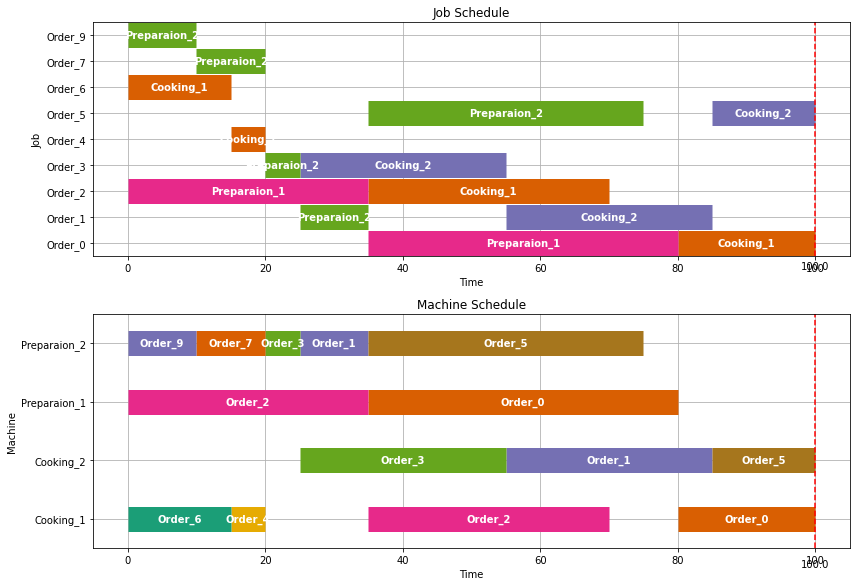

In [143]:
def visualize(results):
    
    schedule = pd.DataFrame(results)
    JOBS = sorted(list(schedule['Job'].unique()))
    MACHINES = sorted(list(schedule['Machine'].unique()))
    makespan = schedule['Finish'].max()
    
    bar_style = {'alpha':1.0, 'lw':25, 'solid_capstyle':'butt'}
    text_style = {'color':'white', 'weight':'bold', 'ha':'center', 'va':'center'}
    colors = mpl.cm.Dark2.colors

    schedule.sort_values(by=['Job', 'Start'])
    schedule.set_index(['Job', 'Machine'], inplace=True)

    fig, ax = plt.subplots(2,1, figsize=(12, 5+(len(JOBS)+len(MACHINES))/4))

    for jdx, j in enumerate(JOBS, 1):
        for mdx, m in enumerate(MACHINES, 1):
            if (j,m) in schedule.index:
                xs = schedule.loc[(j,m), 'Start']
                xf = schedule.loc[(j,m), 'Finish']
                ax[0].plot([xs, xf], [jdx]*2, c=colors[mdx%7], **bar_style)
                ax[0].text((xs + xf)/2, jdx, m, **text_style)
                ax[1].plot([xs, xf], [mdx]*2, c=colors[jdx%7], **bar_style)
                ax[1].text((xs + xf)/2, mdx, j, **text_style)
                
    ax[0].set_title('Job Schedule')
    ax[0].set_ylabel('Job')
    ax[1].set_title('Machine Schedule')
    ax[1].set_ylabel('Machine')
    
    for idx, s in enumerate([JOBS, MACHINES]):
        ax[idx].set_ylim(0.5, len(s) + 0.5)
        ax[idx].set_yticks(range(1, 1 + len(s)))
        ax[idx].set_yticklabels(s)
        ax[idx].text(makespan, ax[idx].get_ylim()[0]-0.2, "{0:0.1f}".format(makespan), ha='center', va='top')
        ax[idx].plot([makespan]*2, ax[idx].get_ylim(), 'r--')
        ax[idx].set_xlabel('Time')
        ax[idx].grid(True)
        
    fig.tight_layout()

visualize(results)